<a href="https://colab.research.google.com/github/Wo-oJin/2022F-Ajou-ML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
%cd ./drive/MyDrive/Colab Notebooks/HW3
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

/content/drive/MyDrive/Colab Notebooks/HW3


In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [103]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1) # dataframe
y = df['satisfaction'] #series
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

test accuracy: 0.64


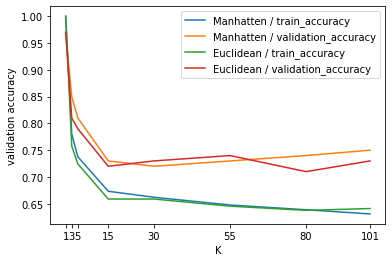

In [112]:
### 문제 1 ###
### 코드 작성 ###
K = [1, 3, 5, 15, 30, 55, 80, 101]

for i in [1,2]: # 1: 맨해튼 거리 척도, 2: 유클리디안 거리 척도
  train_acc = []
  validation_acc = []

  for j in K:
    classifier = KNeighborsClassifier(n_neighbors = j, p = i, metric = 'minkowski')
    classifier.fit(X_train, y_train) # 훈련데이터로 충분히 학습시킨다

    train_acc.append(classifier.score(X_train, y_train))
    validation_acc.append(classifier.score(X_val, y_val))
  
  if(i == 1):
    plt.plot(K, train_acc, label = 'Manhatten / train_accuracy')
    plt.plot(K, validation_acc, label='Manhatten / validation_accuracy')
  else:
    plt.plot(K, train_acc, label = 'Euclidean / train_accuracy')
    plt.plot(K, validation_acc, label='Euclidean / validation_accuracy')

  plt.xlabel('K')
  plt.ylabel('validation accuracy')
  plt.legend()
  plt.xticks(K)

classifier = KNeighborsClassifier(n_neighbors = 55, p = 1, metric = 'minkowski')
classifier.fit(X_train, y_train) # 훈련데이터로 충분히 학습시킨다
test_accuracy = classifier.score(X_test, y_test)
print(f"test accuracy: {test_accuracy}")

**설명 작성**  
- 최적의 파라미터: K = 55
- 설명: validation accuracy만 살펴봤을 땐, 맨해튼 거리와 유클리디안 거리 모두 k=55일 때 높은 편에 속한다. 또한 k=55를 기점으로 train_accuracy 및 validation_accuracy가 지속적으로 감소 및 증가하는 추세를 보이는데 이 추세가 급격한 것이 아닌 완만한 편이라 overfitting 및 underfitting의 위험성도 없다고 판단했다. 

 결론적으로, 각 거리 척도에서 validation_accuracy가 가장 높으며 train, validation accuracy가 k=55을 전후로 완만한 변화율을 보이고 있기 때문에 k=55를 최적의 파라미터로 설정했다.

 또한 거리 척도는 k=55일 때 가장 높은 validation accuracy를 보이는 맨해튼 거리를 택했다.

 test accuracy: 63%

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [9]:
from sklearn.ensemble import RandomForestClassifier

test accuracy = 0.87


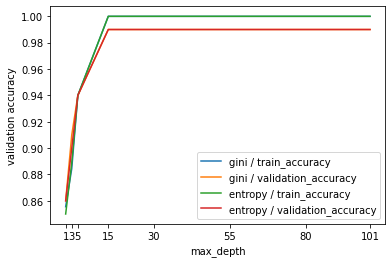

In [111]:
### 문제 2 ###
### 코드 작성 ###
from sklearn.metrics import accuracy_score

max_depths = [1, 3, 5, 15, 30, 55, 80, 101]

criterion = ['gini', 'entropy']
for ct in criterion:
  train_acc = []
  validation_acc = []
  
  for depth in max_depths:
    rf = RandomForestClassifier(criterion = ct, max_depth=depth)
    rf.fit(X_train, y_train)

    pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val,pred)

    train_acc.append(accuracy_score(y_train,rf.predict(X_train)))
    validation_acc.append(accuracy_score(y_val,rf.predict(X_val)))


  if(ct == 'gini'):
      plt.plot(max_depths, train_acc, label = 'gini / train_accuracy')
      plt.plot(max_depths, validation_acc, label='gini / validation_accuracy')
  else:
      plt.plot(max_depths, train_acc, label = 'entropy / train_accuracy')
      plt.plot(max_depths, validation_acc, label='entropy / validation_accuracy')

  plt.xlabel('max_depth')
  plt.ylabel('validation accuracy')
  plt.legend()
  plt.xticks(max_depths)

rf = RandomForestClassifier(criterion = "entropy", max_depth=15)
rf.fit(X_train, y_train)

predict = rf.predict(X_test)
accuracy = accuracy_score(y_test,predict)
print(f"test accuracy = {accuracy}")



**설명 작성**  
- 최적의 파라미터: max_depth = 15
- 설명:

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

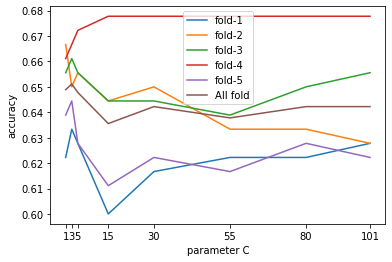

test accuracy = 0.65


In [108]:
### 문제 3-1 ###
### 코드 작성 ###
from sklearn.svm import SVC
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
C = [1, 3, 5, 15, 30, 55, 80, 101]

c_accuracy = [[] for i in range(len(C)+1)]
each_fold_accuracy = [[] for i in range(len(C)+1)]
fold_accuracy = []

kfold = KFold(n_splits = 5) # 5-fold
cnt=0
for train_idx, val_idx in kfold.split(X_train, y_train):
  X_fold_train,X_fold_val = X_train.iloc[train_idx],X_train.iloc[val_idx]
  y_fold_train,y_fold_val = y_train.iloc[train_idx],y_train.iloc[val_idx]

  f_accuracy = 0.0
  for i in range(len(C)):
    svm = SVC(kernel = 'rbf', C = C[i])
    svm.fit(X_fold_train, y_fold_train)

    pred = svm.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val,pred)
   
    c_accuracy[i].append(accuracy) 
    each_fold_accuracy[cnt].append(accuracy)
    f_accuracy += accuracy

  cnt+=1

for i in range(len(C)):
  mean_accuracy = 0

  for k in range(0,5):
    mean_accuracy += c_accuracy[i][k]

  fold_accuracy.append(mean_accuracy/5)

for i in range(0,5):
  plt.plot(C, each_fold_accuracy[i], label = f"fold-{i+1}")

plt.plot(C, fold_accuracy, label = "All fold")
plt.xlabel('parameter C')
plt.ylabel('accuracy')
plt.legend()
plt.xticks(C)
plt.show()

svm = SVC(kernel = 'rbf', C = 5)
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)

print(f"test accuracy = {accuracy}")

**설명 작성**  
- 최적의 파라미터: C = 5
- 설명:

In [ ]:
### 문제 3-2 ###
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터:
- 설명:

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """

####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

In [ ]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################




        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
### 문제 4-3 ###
### 코드 작성 ###

In [ ]:
### 문제 4-3 ###
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값:
- Lasso regression 모델 최적의 alpha 값:

In [ ]:
# 최종 결과 출력